In [53]:
# Let's explore dados.csv

import pandas as pd

df_dados = pd.read_csv('data/bronze/dados_meteomatics.csv', sep=',')

print(df_dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   validdate                  26305 non-null  object 
 1   t_2m:C                     26305 non-null  float64
 2   wind_dir_10m:d             26305 non-null  float64
 3   wind_speed_10m:ms          26305 non-null  float64
 4   mean_wave_direction:d      26305 non-null  float64
 5   mean_wave_period:s         26305 non-null  float64
 6   precip_1h:mm               26305 non-null  float64
 7   pressure_2m:hPa            26305 non-null  int64  
 8   significant_wave_height:m  26305 non-null  float64
 9   datetime_sp                26305 non-null  object 
 10  datetime_sp_naive          26305 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.2+ MB
None


In [ ]:
# verificar tamanho maximo de ondas
max_tamanho_ondas = df_dados['significant_wave_height:m'].max()
print(f"Tamanho máximo das ondas: {max_tamanho_ondas} m")

Tamanho máximo das ondas: 4.4 m


: 

In [14]:
# Esses são dados temporais da praia de moçambique florianopolis
# Precisamos converter a coluna validdate para datetime e trocar o nome para data
# e tambem ordenar por data, do mais antigo para o mais novo
#df_dados['data'] = pd.to_datetime(df_dados['validdate'], format='%Y-%m-%dT%H:%M:%SZ')
#df_dados = df_dados.drop(columns=['validdate'])
df_dados = df_dados.sort_values(by='data')

df_dados.head()

,t_2m:C,wind_dir_10m:d,wind_speed_10m:ms,mean_wave_direction:d,mean_wave_period:s,precip_1h:mm,pressure_2m:hPa,significant_wave_height:m,data
0,25.2,20.2,5.9,63.5,6.0,0.00,1007,1.33,2019-12-31 23:00:00
1,25.2,17.2,6.4,64.0,6.0,0.07,1008,1.31,2020-01-01 00:00:00
2,25.3,7.6,5.9,64.2,6.0,0.25,1008,1.31,2020-01-01 01:00:00
3,25.2,4.5,6.1,64.4,6.0,0.05,1008,1.30,2020-01-01 02:00:00
4,25.2,2.6,6.2,64.6,6.0,0.11,1008,1.30,2020-01-01 03:00:00


In [ ]:
# documentação das colunas : 
# t_2m:C - Instantaneous temperature at 2m above ground in degrees Celsius (C), kelvin (K) or degree Fahrenheit (F)
# wind_dir_10m:d - Instantaneous wind direction at 10m above ground in degrees
# wind_speed_10m:ms - Instantaneous wind speed at 10m above ground
# mean_wave_direction:d - Spectral mean direction in degrees over all frequencies and directions of the two-dimensional wave spectrum.
# mean_wave_period:s - Spectral mean wave period obtained using the reciprocal frequency moment of the full wave spectrum.
#                      The integration is performed over all theoretical frequencies up to infinity. Again, the frequency wave spectrum
#                      is obtained by integrating the two-dimensional wave spectrum over all directions.
# precip_1h:mm - Precipitation accumulated over the past hour in millimeter (equivalent to litres per square meter)
# pressure_2m:hPa - Gives the pressure adjusted to sea level. To adjust the pressure to the mean sea level atmospheric conditions such as temperature are taken into account.in hpa
# significant_wave_height:m - significant wave height


In [22]:
colunas = df_dados.columns.to_list()[:-1]

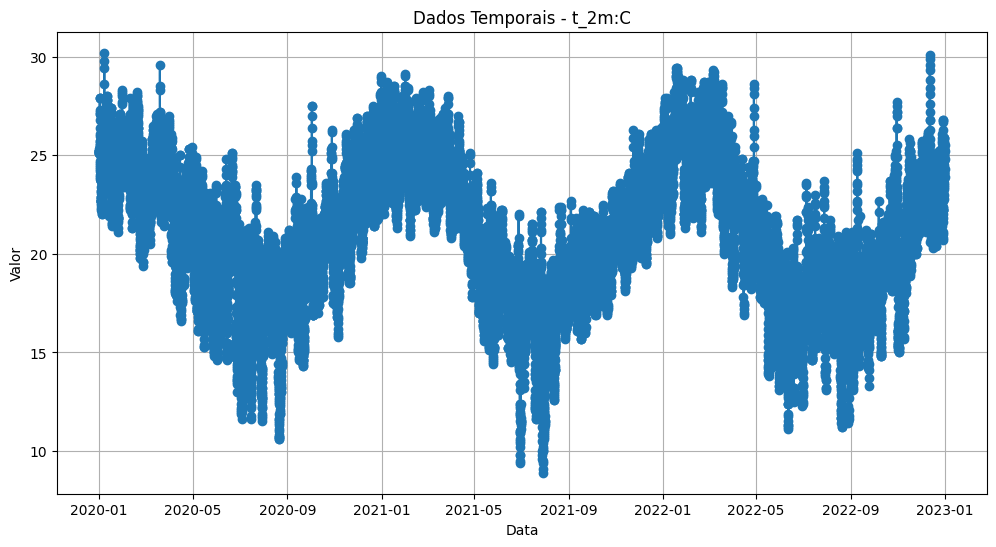

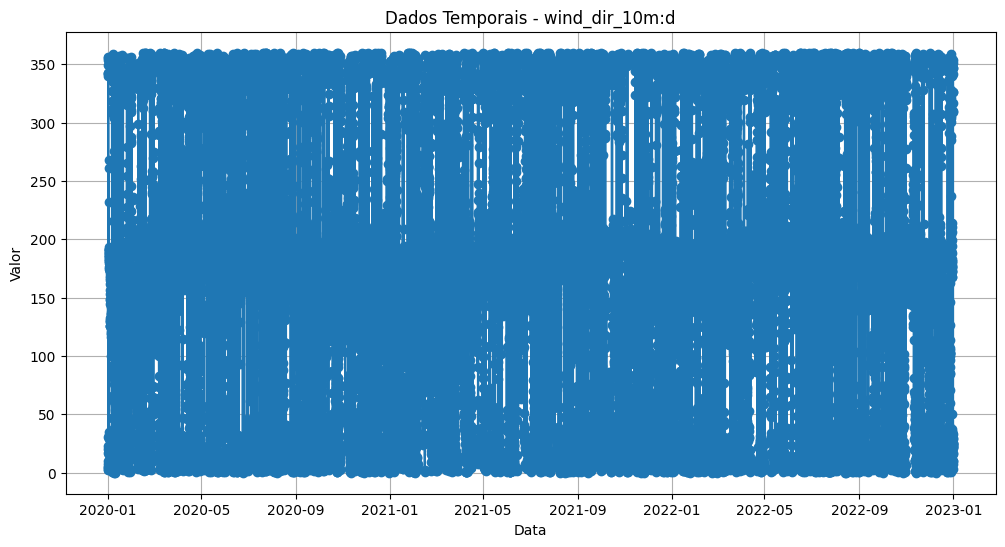

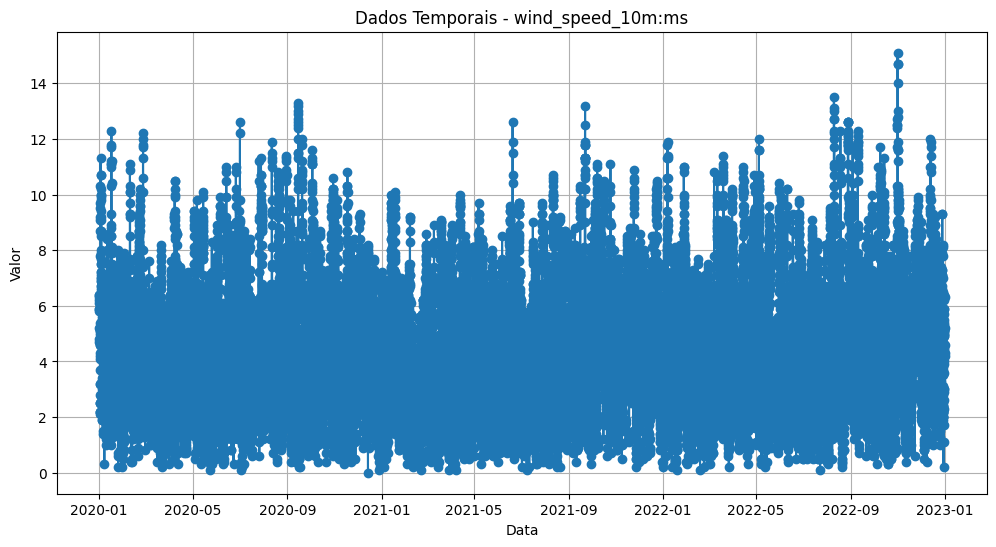

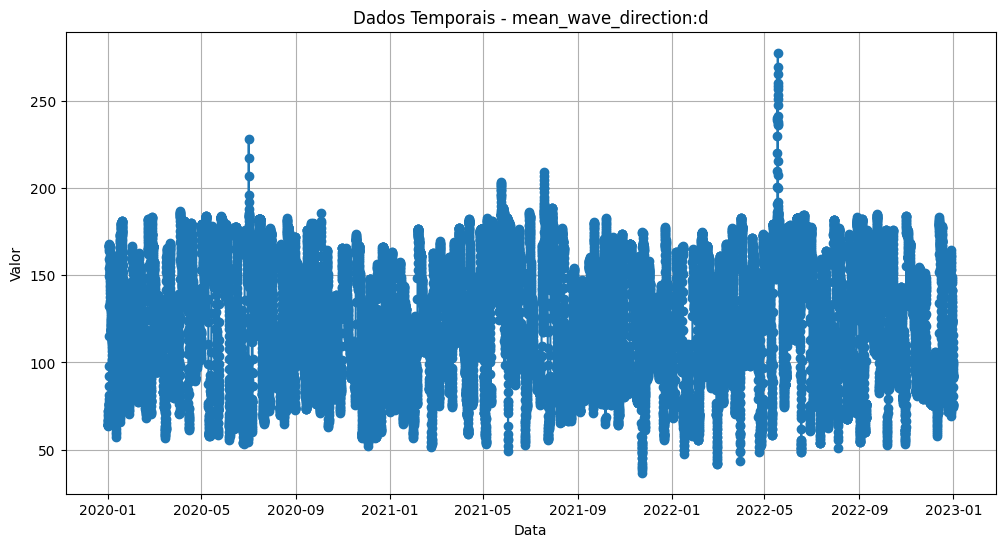

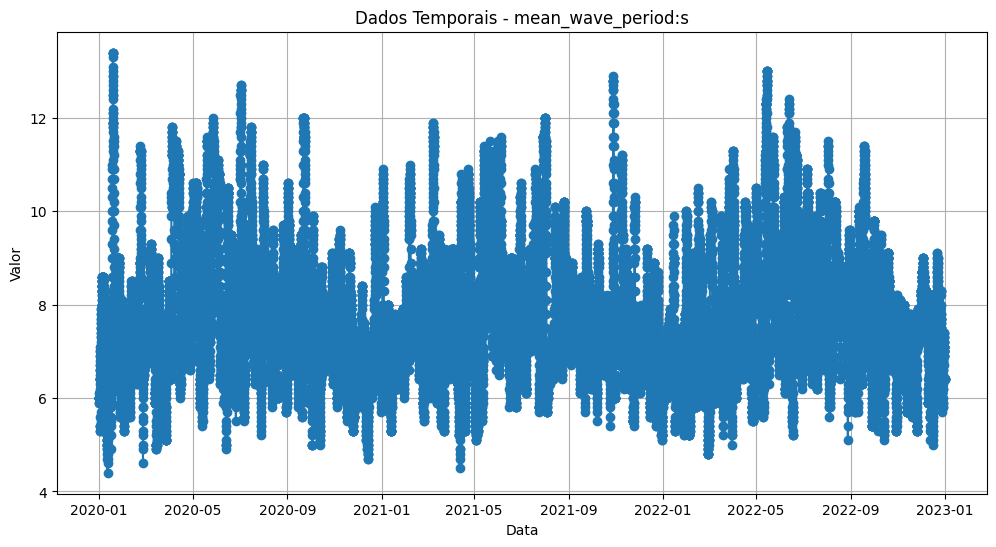

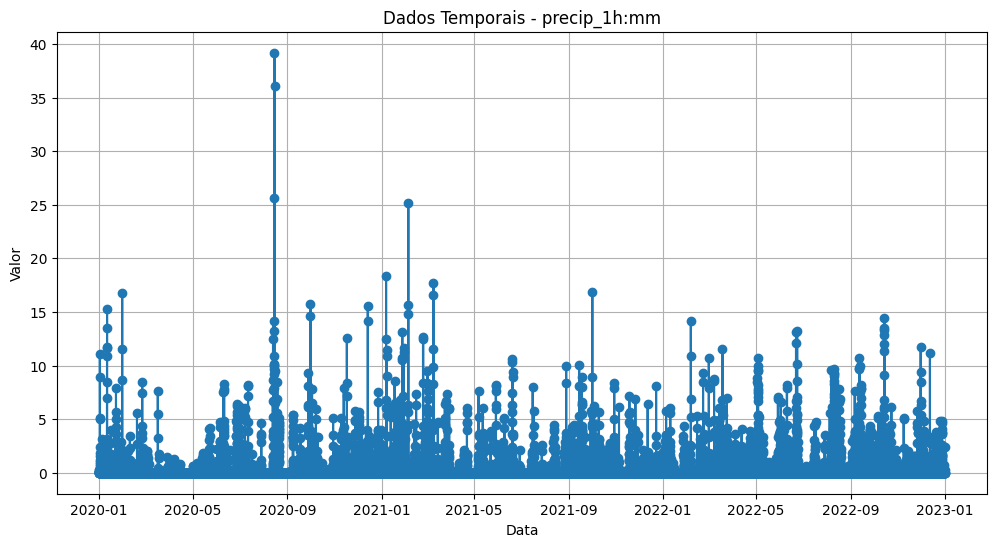

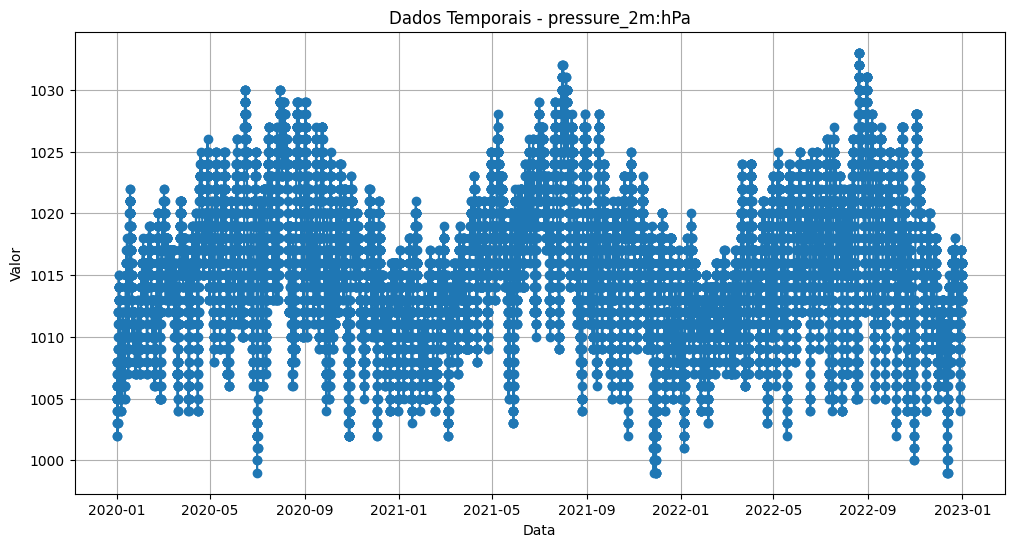

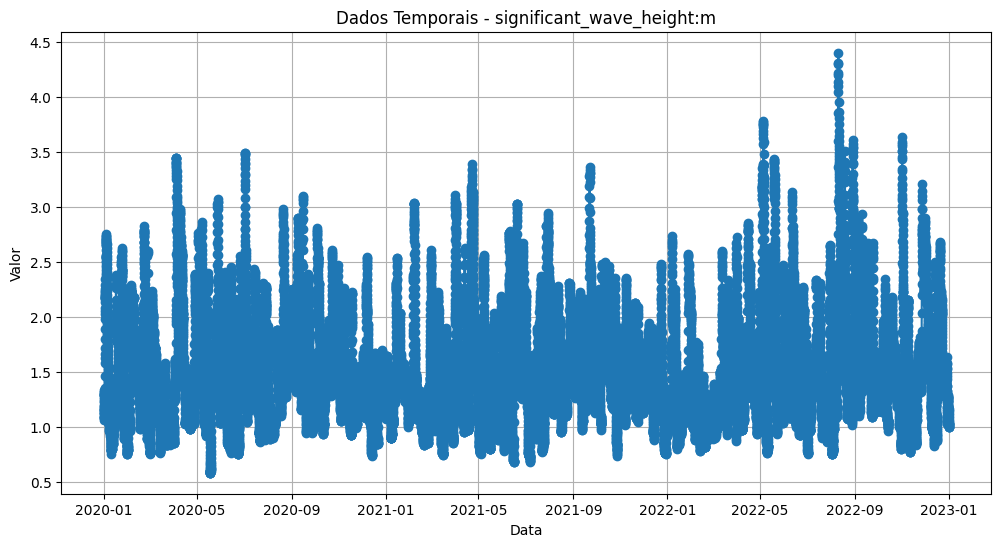

In [24]:
# funcao para gerar um grafico para cada coluna na variavel colunas, a fim de visualizar os dados e verificar outliers

def plotar_graficos(df, colunas):
    for coluna in colunas:
        plt.figure(figsize=(12, 6))
        plt.plot(df['data'], df[coluna], marker='o')
        plt.title(f'Dados Temporais - {coluna}')
        plt.xlabel('Data')
        plt.ylabel('Valor')
        plt.grid()
        plt.show()

plotar_graficos(df_dados, colunas)

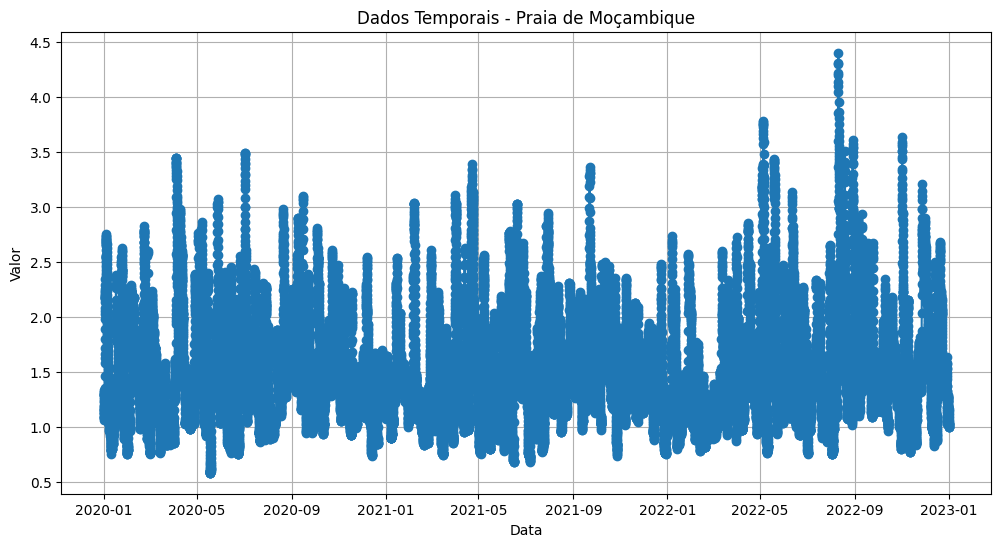

In [18]:
# vamos explorar os dados, visualizar se existem dados faltantes de datas. podemos fazer um lineplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_dados['data'], df_dados['significant_wave_height:m'], marker='o')
plt.title('Dados Temporais - Praia de Moçambique')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid()
plt.show()

In [25]:
# Os dados parecem estar lindos, sem outliers expressivos, preenchidos e sem nulos.

# vamos agora trazer dados do surfline para o mesmo local, sobre o mesmo periodo

data_inicio_dados = df_dados['data'].min()
data_fim_dados = df_dados['data'].max()
print(f'Temos dados Meteorológicos da praia de Moçambique desde: {data_inicio_dados} até {data_fim_dados}')


Temos dados Meteorológicos da praia de Moçambique desde: 2019-12-31 23:00:00 até 2022-12-31 23:00:00


## Vamos agora tentar pegar dados do surfline

In [5]:
import requests
import json # Usaremos para imprimir o resultado de forma bonita

print("--- Teste Simples: Buscando UMA informação (Rating) ---")

# Vamos usar a URL exata que você encontrou no seu 'cURL'.
# A parte mais importante é o '&accesstoken=...' no final.
URL_TESTE_RATING = 'https://services.surfline.com/kbyg/spots/forecasts/rating?spotId=5842041f4e65fad6a7708cee&days=16&intervalHours=1&start=2020-01-01&cacheEnabled=true&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# Headers mínimos, baseados no seu cURL. Note que nem estamos usando o cookie desta vez,
# pois o 'accesstoken' na URL pode ser o suficiente.
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    print(f"Tentando acessar a URL: {URL_TESTE_RATING}")
    response = requests.get(URL_TESTE_RATING, headers=HEADERS)

    # Checando o status da resposta
    if response.status_code == 200:
        print("\n✅ SUCESSO! Conexão funcionou e recebemos os dados.")
        print("Status Code:", response.status_code)
        
        # Pegando os dados em formato JSON
        dados_json = response.json()
        
        print("\n--- PRIMEIRO REGISTRO RECEBIDO ---")
        # Usamos json.dumps para imprimir o JSON de forma legível (com indentação)
        # Vamos imprimir apenas o primeiro item da lista de ratings para confirmar.
        primeiro_rating = dados_json.get('data', {}).get('rating', [{}])[0]
        print(json.dumps(primeiro_rating, indent=2))

    else:
        # Se falhar, vamos imprimir a razão exata que o servidor nos deu
        print(f"\n❌ FALHA! A requisição não funcionou.")
        print("Status Code:", response.status_code)
        print("Resposta do Servidor:", response.text) 

except Exception as e:
    print(f"\n❌ Ocorreu um erro de conexão: {e}")

--- Teste Simples: Buscando UMA informação (Rating) ---
Tentando acessar a URL: https://services.surfline.com/kbyg/spots/forecasts/rating?spotId=5842041f4e65fad6a7708cee&days=16&intervalHours=1&start=2020-01-01&cacheEnabled=true&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283

✅ SUCESSO! Conexão funcionou e recebemos os dados.
Status Code: 200

--- PRIMEIRO REGISTRO RECEBIDO ---
{
  "timestamp": 1577847600,
  "utcOffset": -3,
  "rating": {
    "key": "POOR",
    "value": 1
  }
}


In [6]:
import requests
import pandas as pd
import json

print("--- Passo 2: Extraindo todos os ratings e criando o DataFrame ---")

# A mesma URL e headers que já sabemos que funcionam
URL_RATING = 'https://services.surfline.com/kbyg/spots/forecasts/rating?spotId=5842041f4e65fad6a7708cee&days=16&intervalHours=1&start=2020-01-01&cacheEnabled=true&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'
HEADERS = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_RATING, headers=HEADERS)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados recebidos novamente.")
        dados_json = response.json()

        # 1. EXTRAIR TODOS OS DADOS E CRIAR O DATAFRAME
        # A função 'json_normalize' do pandas é perfeita para isso.
        # Ela pega a lista que está dentro de ['data']['rating'] e a transforma em uma tabela.
        df = pd.json_normalize(dados_json['data']['rating'])
        
        print(f"Foram encontrados {len(df)} registros de rating para o período.")

        # 2. CONVERTER O TIMESTAMP PARA DATETIME
        # Criamos uma nova coluna 'datetime' a partir da coluna 'timestamp'.
        # 'unit="s"' diz que o número são segundos. 'utc=True' informa que o tempo é universal.
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        
        # Agora, convertemos do tempo universal (UTC) para o nosso fuso horário local.
        df['datetime'] = df['datetime'].dt.tz_convert('America/Sao_Paulo')

        # 3. LIMPAR E ORGANIZAR O DATAFRAME FINAL
        # O json_normalize cria colunas como 'rating.key'. Vamos renomeá-las.
        df.rename(columns={'rating.key': 'rating_texto', 'rating.value': 'rating_valor'}, inplace=True)
        
        # Selecionando e reordenando apenas as colunas que nos interessam para a visualização.
        df_final = df[['datetime', 'rating_texto', 'rating_valor']]

        print("\n--- DataFrame final com os ratings por hora ---")
        # O comando 'display()' é ideal para mostrar DataFrames no Jupyter Notebook.
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Passo 2: Extraindo todos os ratings e criando o DataFrame ---
✅ SUCESSO! Dados recebidos novamente.
Foram encontrados 384 registros de rating para o período.

--- DataFrame final com os ratings por hora ---


,datetime,rating_texto,rating_valor
0,2020-01-01 00:00:00-03:00,POOR,1
1,2020-01-01 01:00:00-03:00,POOR,1
2,2020-01-01 02:00:00-03:00,POOR,1
3,2020-01-01 03:00:00-03:00,POOR,1
4,2020-01-01 04:00:00-03:00,POOR,1
...,...,...,...
379,2020-01-16 19:00:00-03:00,VERY_POOR,0
380,2020-01-16 20:00:00-03:00,VERY_POOR,0
381,2020-01-16 21:00:00-03:00,VERY_POOR,0
382,2020-01-16 22:00:00-03:00,VERY_POOR,0


In [9]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm # Biblioteca para a barra de progresso

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================

# Defina o período completo do projeto
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'

# Headers que já sabemos que funcionam
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

# Parâmetros base da URL (o token pode expirar no futuro)
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS
# ==============================================================================

def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    """Gera uma lista de datas formatadas como string, pulando de X em X dias."""
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    
    datas_geradas = []
    data_atual = data_inicio
    
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
        
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO
# ==============================================================================

# Geramos a lista de todas as janelas de 16 dias que precisamos buscar
lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)

# Criamos uma lista vazia para armazenar os DataFrames de cada período
lista_de_dataframes = []

print(f"Iniciando extração de dados para {len(lista_de_datas)} períodos de 16 dias...")
print(f"Período total: {PROJECT_START_DATE} até {PROJECT_END_DATE}")

# Usamos 'tqdm' para criar uma barra de progresso automática
for data_inicio in tqdm(lista_de_datas, desc="Buscando dados do Surfline"):
    try:
        # Monta a URL específica para esta iteração do loop
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/rating?spotId={SPOT_ID}&days=16&intervalHours=1&start={data_inicio}&cacheEnabled=true&accesstoken={ACCESS_TOKEN}'
        
        response = requests.get(url_periodo, headers=HEADERS, timeout=10)

        if response.status_code == 200:
            dados_json = response.json()
            df_periodo = pd.json_normalize(dados_json['data']['rating'])
            
            # Adicionamos o DataFrame deste período à nossa lista
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            # Se uma data específica falhar, apenas avisamos e continuamos
            print(f"\nAviso: Falha ao buscar dados para o período iniciado em {data_inicio}. Status: {response.status_code}")

    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    
    # IMPORTANTE: Pausa de 2 segundos para não sobrecarregar o servidor
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================

if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados...")
    
    # 'pd.concat' junta todos os DataFrames da lista em um só
    surfline_bronze_rankings = pd.concat(lista_de_dataframes, ignore_index=True)
    
    # Fazendo o mesmo tratamento de data que validamos anteriormente
    surfline_bronze_rankings['datetime'] = pd.to_datetime(surfline_bronze_rankings['timestamp'], unit='s', utc=True)
    surfline_bronze_rankings['datetime'] = surfline_bronze_rankings['datetime'].dt.tz_convert('America/Sao_Paulo')
    surfline_bronze_rankings.rename(columns={'rating.key': 'rating_texto', 'rating.value': 'rating_valor'}, inplace=True)
    surfline_bronze_rankings = surfline_bronze_rankings[['datetime', 'rating_texto', 'rating_valor', 'timestamp']]

    print("\n--- Informações do DataFrame Final ---")
    surfline_bronze_rankings.info()

    print("\n--- Amostra dos Dados (Início) ---")
    display(surfline_bronze_rankings.head())

    print("\n--- Amostra dos Dados (Fim) ---")
    display(surfline_bronze_rankings.tail())
    
    # Salvando o resultado final em um arquivo CSV
    nome_arquivo = 'surfline_bronze_rankings.csv'
    surfline_bronze_rankings.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado foi extraído. Verifique o token de acesso ou a conexão.")

Iniciando extração de dados para 69 períodos de 16 dias...
Período total: 2020-01-01 até 2022-12-31


Buscando dados do Surfline: 100%|██████████| 69/69 [04:10<00:00,  3.63s/it]



Extração finalizada. Consolidando todos os dados...

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype                            
---  ------        --------------  -----                            
 0   datetime      26496 non-null  datetime64[ns, America/Sao_Paulo]
 1   rating_texto  26496 non-null  object                           
 2   rating_valor  26496 non-null  int64                            
 3   timestamp     26496 non-null  int64                            
dtypes: datetime64[ns, America/Sao_Paulo](1), int64(2), object(1)
memory usage: 828.1+ KB

--- Amostra dos Dados (Início) ---


,datetime,rating_texto,rating_valor,timestamp
0,2020-01-01 00:00:00-03:00,POOR,1,1577847600
1,2020-01-01 01:00:00-03:00,POOR,1,1577851200
2,2020-01-01 02:00:00-03:00,POOR,1,1577854800
3,2020-01-01 03:00:00-03:00,POOR,1,1577858400
4,2020-01-01 04:00:00-03:00,POOR,1,1577862000



--- Amostra dos Dados (Fim) ---


,datetime,rating_texto,rating_valor,timestamp
26491,2023-01-08 19:00:00-03:00,POOR_TO_FAIR,2,1673215200
26492,2023-01-08 20:00:00-03:00,POOR_TO_FAIR,2,1673218800
26493,2023-01-08 21:00:00-03:00,POOR_TO_FAIR,2,1673222400
26494,2023-01-08 22:00:00-03:00,POOR_TO_FAIR,2,1673226000
26495,2023-01-08 23:00:00-03:00,POOR_TO_FAIR,2,1673229600



✅ Dados salvos com sucesso no arquivo 'surfline_bronze_rankings.csv'!


In [10]:
import requests
import pandas as pd
import json

print("--- Teste: Extraindo Altura das Ondas (Surf) ---")

# A URL exata que você encontrou no seu novo cURL.
URL_SURF = 'https://services.surfline.com/kbyg/spots/forecasts/surf?cacheEnabled=true&days=16&intervalHours=1&spotId=5842041f4e65fad6a7708cee&start=2020-01-01&units%5BwaveHeight%5D=M&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# Headers simples que já sabemos que funcionam.
HEADERS = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_SURF, headers=HEADERS)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados de altura de onda recebidos.")
        dados_json = response.json()

        # 1. EXTRAIR OS DADOS E CRIAR O DATAFRAME
        # A única mudança é aqui: o caminho para os dados agora é ['data']['surf']
        df = pd.json_normalize(dados_json['data']['surf'])
        
        print(f"Foram encontrados {len(df)} registros de altura de onda para o período.")

        # 2. CONVERTER O TIMESTAMP PARA DATETIME (mesmo processo de antes)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        df['datetime'] = df['datetime'].dt.tz_convert('America/Sao_Paulo')

        # 3. ORGANIZAR O DATAFRAME FINAL
        # O json_normalize já cria colunas como 'surf.min', 'surf.max', etc.
        # Vamos selecionar as mais importantes para a visualização.
        df_final = df[['datetime', 'surf.min', 'surf.max', 'surf.humanRelation']]

        print("\n--- DataFrame final com a altura das ondas por hora (em metros) ---")
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")
        print("Resposta do Servidor:", response.text)

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Teste: Extraindo Altura das Ondas (Surf) ---
✅ SUCESSO! Dados de altura de onda recebidos.
Foram encontrados 384 registros de altura de onda para o período.

--- DataFrame final com a altura das ondas por hora (em metros) ---


,datetime,surf.min,surf.max,surf.humanRelation
0,2020-01-01 00:00:00-03:00,0.6,0.9,Thigh to waist
1,2020-01-01 01:00:00-03:00,0.6,0.9,Thigh to waist
2,2020-01-01 02:00:00-03:00,0.6,0.9,Thigh to waist
3,2020-01-01 03:00:00-03:00,0.6,0.9,Thigh to waist
4,2020-01-01 04:00:00-03:00,0.6,0.9,Thigh to waist
...,...,...,...,...
379,2020-01-16 19:00:00-03:00,1.2,2.0,Chest to 0.3m overhead
380,2020-01-16 20:00:00-03:00,1.2,2.0,Chest to 0.3m overhead
381,2020-01-16 21:00:00-03:00,1.2,2.0,Chest to 0.3m overhead
382,2020-01-16 22:00:00-03:00,1.2,2.0,Chest to 0.3m overhead


In [11]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm # Para a barra de progresso

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================

# Período completo do projeto
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'

# Headers
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

# Parâmetros base da URL
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS (sem alterações)
# ==============================================================================

def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    """Gera uma lista de datas formatadas como string, pulando de X em X dias."""
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    datas_geradas = []
    data_atual = data_inicio
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO PARA 'SURF'
# ==============================================================================

lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)
lista_de_dataframes = []

print(f"Iniciando extração de ALTURA DE ONDA para {len(lista_de_datas)} períodos...")

for data_inicio in tqdm(lista_de_datas, desc="Buscando dados de 'surf'"):
    try:
        # Monta a URL específica para 'surf', com o parâmetro de unidades em metros
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/surf?cacheEnabled=true&days=16&intervalHours=1&spotId={SPOT_ID}&start={data_inicio}&units%5BwaveHeight%5D=M&accesstoken={ACCESS_TOKEN}'
        
        response = requests.get(url_periodo, headers=HEADERS, timeout=10)

        if response.status_code == 200:
            dados_json = response.json()
            # O caminho para os dados é ['data']['surf']
            df_periodo = pd.json_normalize(dados_json['data']['surf'])
            
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            print(f"\nAviso: Falha ao buscar dados para o período iniciado em {data_inicio}. Status: {response.status_code}")

    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    
    # Pausa de 2 segundos para não sobrecarregar o servidor
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================

if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados de altura de onda...")
    
    # Junta todos os DataFrames da lista em um só
    df_surf_completo = pd.concat(lista_de_dataframes, ignore_index=True)
    
    # Tratamento de data e fuso horário
    df_surf_completo['datetime'] = pd.to_datetime(df_surf_completo['timestamp'], unit='s', utc=True)
    df_surf_completo['datetime'] = df_surf_completo['datetime'].dt.tz_convert('America/Sao_Paulo')
    
    # Selecionando as colunas de interesse
    colunas_finais = ['datetime', 'timestamp', 'surf.min', 'surf.max', 'surf.humanRelation']
    df_surf_completo = df_surf_completo[colunas_finais]

    # --- Filtro final para garantir que os dados terminem em 2022-12-31 ---
    print(f"Total de registros antes do filtro: {len(df_surf_completo)}")
    data_final_filtro = pd.to_datetime(f"{PROJECT_END_DATE} 23:59:59").tz_localize('America/Sao_Paulo')
    df_surf_completo = df_surf_completo[df_surf_completo['datetime'] <= data_final_filtro]
    print(f"Total de registros após o filtro: {len(df_surf_completo)}")
    # --- Fim do filtro ---
    
    print("\n--- Informações do DataFrame Final ---")
    df_surf_completo.info()
    display(df_surf_completo.head())
    display(df_surf_completo.tail())
    
    # Salvando em um arquivo CSV específico para esta entidade
    nome_arquivo = 'surfline_bronze_surf_height.csv'
    df_surf_completo.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados de altura de onda salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado de altura de onda foi extraído.")

Iniciando extração de ALTURA DE ONDA para 69 períodos...


Buscando dados de 'surf': 100%|██████████| 69/69 [03:53<00:00,  3.39s/it]



Extração finalizada. Consolidando todos os dados de altura de onda...
Total de registros antes do filtro: 26496
Total de registros após o filtro: 26304

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 26304 entries, 0 to 26303
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype                            
---  ------              --------------  -----                            
 0   datetime            26304 non-null  datetime64[ns, America/Sao_Paulo]
 1   timestamp           26304 non-null  int64                            
 2   surf.min            26304 non-null  float64                          
 3   surf.max            26304 non-null  float64                          
 4   surf.humanRelation  26304 non-null  object                           
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(2), int64(1), object(1)
memory usage: 1.2+ MB


,datetime,timestamp,surf.min,surf.max,surf.humanRelation
0,2020-01-01 00:00:00-03:00,1577847600,0.6,0.9,Thigh to waist
1,2020-01-01 01:00:00-03:00,1577851200,0.6,0.9,Thigh to waist
2,2020-01-01 02:00:00-03:00,1577854800,0.6,0.9,Thigh to waist
3,2020-01-01 03:00:00-03:00,1577858400,0.6,0.9,Thigh to waist
4,2020-01-01 04:00:00-03:00,1577862000,0.6,0.9,Thigh to waist


,datetime,timestamp,surf.min,surf.max,surf.humanRelation
26299,2022-12-31 19:00:00-03:00,1672524000,0.3,0.6,Knee to thigh
26300,2022-12-31 20:00:00-03:00,1672527600,0.3,0.6,Knee to thigh
26301,2022-12-31 21:00:00-03:00,1672531200,0.3,0.6,Knee to thigh
26302,2022-12-31 22:00:00-03:00,1672534800,0.3,0.6,Knee to thigh
26303,2022-12-31 23:00:00-03:00,1672538400,0.3,0.6,Knee to thigh



✅ Dados de altura de onda salvos com sucesso no arquivo 'surfline_bronze_surf_height.csv'!


In [13]:
import requests
import pandas as pd
import json

print("--- Teste Corrigido: Extraindo Dados de Swell (16 dias) ---")

# URL e Headers permanecem os mesmos
URL_SWELLS_TESTE = 'https://services.surfline.com/kbyg/spots/forecasts/swells?cacheEnabled=true&days=16&intervalHours=1&spotId=5842041f4e65fad6a7708cee&start=2020-01-01&units%5BswellHeight%5D=M&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_SWELLS_TESTE, headers=HEADERS, timeout=10)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados de swell recebidos.")
        dados_json = response.json()

        # --- CORREÇÃO AQUI ---
        # Adicionamos o parâmetro 'meta_prefix' para resolver o conflito de nomes.
        # As colunas de 'meta' agora serão criadas como 'total_timestamp', 'total_utcOffset' e 'total_power'.
        df = pd.json_normalize(
            dados_json['data']['swells'],
            record_path=['swells'],
            meta=['timestamp', 'utcOffset', 'power'],
            meta_prefix='total_' # Adiciona o prefixo 'total_' às colunas de 'meta'
        )
        
        print(f"Foram encontrados {len(df)} componentes de swell no período.")

        # Agora, usamos as colunas com prefixo para o tratamento
        df['datetime'] = pd.to_datetime(df['total_timestamp'], unit='s', utc=True)
        df['datetime'] = df['datetime'].dt.tz_convert('America/Sao_Paulo')
        
        # Renomeando a coluna de power total para maior clareza
        df.rename(columns={'total_power': 'power_total_combinado_kj', 'power': 'power_swell_individual_kj'}, inplace=True)
        
        # Selecionando e reordenando as colunas de interesse
        colunas_finais = ['datetime', 'height', 'period', 'direction', 'power_swell_individual_kj', 'power_total_combinado_kj']
        df_final = df[colunas_finais]

        print("\n--- DataFrame com os componentes de swell por hora ---")
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")
        print("Resposta do Servidor:", response.text)

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Teste Corrigido: Extraindo Dados de Swell (16 dias) ---
✅ SUCESSO! Dados de swell recebidos.
Foram encontrados 2304 componentes de swell no período.

--- DataFrame com os componentes de swell por hora ---


,datetime,height,period,direction,power_swell_individual_kj,power_total_combinado_kj
0,2020-01-01 00:00:00-03:00,0.00000,0,0.00000,0.00000,79.52864
1,2020-01-01 00:00:00-03:00,0.06612,7,148.76266,0.03522,79.52864
2,2020-01-01 00:00:00-03:00,1.13461,6,51.30005,25.00685,79.52864
3,2020-01-01 00:00:00-03:00,0.81898,9,83.86670,54.48657,79.52864
4,2020-01-01 00:00:00-03:00,0.00000,0,0.00000,0.00000,79.52864
...,...,...,...,...,...,...
2299,2020-01-16 23:00:00-03:00,0.00000,0,0.00000,0.00000,577.65944
2300,2020-01-16 23:00:00-03:00,0.44316,6,61.96204,1.87471,577.65944
2301,2020-01-16 23:00:00-03:00,0.00000,0,0.00000,0.00000,577.65944
2302,2020-01-16 23:00:00-03:00,0.00000,0,0.00000,0.00000,577.65944


In [16]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS
# ==============================================================================
def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    datas_geradas = []
    data_atual = data_inicio
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO PARA 'SWELLS'
# ==============================================================================
lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)
lista_de_dataframes = []

print(f"Iniciando extração de DADOS DE SWELL para {len(lista_de_datas)} períodos...")

for data_inicio in tqdm(lista_de_datas, desc="Buscando dados de 'swells'"):
    try:
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/swells?cacheEnabled=true&days=16&intervalHours=1&spotId={SPOT_ID}&start={data_inicio}&units%5BswellHeight%5D=M&accesstoken={ACCESS_TOKEN}'
        response = requests.get(url_periodo, headers=HEADERS, timeout=15)

        if response.status_code == 200:
            dados_json = response.json()
            df_periodo = pd.json_normalize(
                dados_json['data']['swells'], 
                record_path=['swells'], 
                meta=['timestamp', 'utcOffset', 'power'],
                meta_prefix='total_'
            )
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            print(f"\nAviso: Falha ao buscar dados para {data_inicio}. Status: {response.status_code}")
    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================
if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados de swell...")
    
    df_swells_completo = pd.concat(lista_de_dataframes, ignore_index=True)
    
    df_swells_completo['datetime'] = pd.to_datetime(df_swells_completo['total_timestamp'], unit='s', utc=True)
    df_swells_completo['datetime'] = df_swells_completo['datetime'].dt.tz_convert('America/Sao_Paulo')
    
    df_swells_completo.rename(columns={'total_power': 'power_total_combinado_kj', 'power': 'power_swell_individual_kj'}, inplace=True)

    print(f"Total de registros antes do filtro: {len(df_swells_completo)}")
    data_final_filtro = pd.to_datetime(f"{PROJECT_END_DATE} 23:59:59").tz_localize('America/Sao_Paulo')
    df_swells_completo = df_swells_completo[df_swells_completo['datetime'] <= data_final_filtro]
    print(f"Total de registros após o filtro: {len(df_swells_completo)}")
    
    colunas_finais = ['datetime', 'height', 'period', 'direction', 'power_swell_individual_kj', 'power_total_combinado_kj', 'total_timestamp']
    df_swells_completo = df_swells_completo.reindex(columns=colunas_finais)

    print("\n--- Informações do DataFrame Final ---")
    df_swells_completo.info()
    display(df_swells_completo.head())
    
    nome_arquivo = 'surfline_bronze_swells.csv'
    df_swells_completo.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados de swell salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado de swell foi extraído.")



Extração finalizada. Consolidando todos os dados de swell...
Total de registros antes do filtro: 158976
Total de registros após o filtro: 157824

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 157824 entries, 0 to 157823
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype                            
---  ------                     --------------   -----                            
 0   datetime                   157824 non-null  datetime64[ns, America/Sao_Paulo]
 1   height                     157824 non-null  float64                          
 2   period                     157824 non-null  int64                            
 3   direction                  157824 non-null  float64                          
 4   power_swell_individual_kj  157824 non-null  float64                          
 5   power_total_combinado_kj   157824 non-null  object                           
 6   total_timestamp            157824 non-n

,datetime,height,period,direction,power_swell_individual_kj,power_total_combinado_kj,total_timestamp
0,2020-01-01 00:00:00-03:00,0.00000,0,0.00000,0.00000,79.52864,1577847600
1,2020-01-01 00:00:00-03:00,0.06612,7,148.76266,0.03522,79.52864,1577847600
2,2020-01-01 00:00:00-03:00,1.13461,6,51.30005,25.00685,79.52864,1577847600
3,2020-01-01 00:00:00-03:00,0.81898,9,83.86670,54.48657,79.52864,1577847600
4,2020-01-01 00:00:00-03:00,0.00000,0,0.00000,0.00000,79.52864,1577847600



✅ Dados de swell salvos com sucesso no arquivo 'surfline_bronze_swells.csv'!


In [17]:
import requests
import pandas as pd

print("--- Teste: Extraindo Dados de Vento (Wind) ---")

# URL específica para o endpoint 'wind' que você encontrou.
URL_WIND_TESTE = 'https://services.surfline.com/kbyg/spots/forecasts/wind?spotId=5842041f4e65fad6a7708cee&days=16&intervalHours=1&corrected=true&cacheEnabled=true&units%5BwindSpeed%5D=KPH&start=2020-01-01&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# Headers que já sabemos que funcionam.
HEADERS = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_WIND_TESTE, headers=HEADERS, timeout=10)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados de vento recebidos.")
        dados_json = response.json()

        # A estrutura é simples, então um json_normalize direto no caminho ['data']['wind'] funciona.
        df = pd.json_normalize(dados_json['data']['wind'])
        
        print(f"Foram encontrados {len(df)} registros de vento para o período.")

        # Convertendo o timestamp para datetime (mesmo processo de sempre).
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        df['datetime'] = df['datetime'].dt.tz_convert('America/Sao_Paulo')

        # Selecionando as colunas mais importantes para a visualização.
        colunas_finais = ['datetime', 'speed', 'gust', 'direction', 'directionType']
        df_final = df[colunas_finais]

        print("\n--- DataFrame com os dados de vento por hora (velocidade em KPH) ---")
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")
        print("Resposta do Servidor:", response.text)

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Teste: Extraindo Dados de Vento (Wind) ---
✅ SUCESSO! Dados de vento recebidos.
Foram encontrados 384 registros de vento para o período.

--- DataFrame com os dados de vento por hora (velocidade em KPH) ---


,datetime,speed,gust,direction,directionType
0,2020-01-01 00:00:00-03:00,32.57164,39.26906,3.22368,Offshore
1,2020-01-01 01:00:00-03:00,32.57164,39.26906,3.22368,Offshore
2,2020-01-01 02:00:00-03:00,32.57164,39.26906,3.22368,Offshore
3,2020-01-01 03:00:00-03:00,32.83786,40.74897,1.37415,Offshore
4,2020-01-01 04:00:00-03:00,32.83786,40.74897,1.37415,Offshore
...,...,...,...,...,...
379,2020-01-16 19:00:00-03:00,45.57421,51.16913,190.95609,Onshore
380,2020-01-16 20:00:00-03:00,45.57421,51.16913,190.95609,Onshore
381,2020-01-16 21:00:00-03:00,41.86312,46.82516,185.55658,Onshore
382,2020-01-16 22:00:00-03:00,41.86312,46.82516,185.55658,Onshore


In [18]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS (sem alterações)
# ==============================================================================
def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    datas_geradas = []
    data_atual = data_inicio
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO PARA 'WIND'
# ==============================================================================
lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)
lista_de_dataframes = []

print(f"Iniciando extração de DADOS DE VENTO para {len(lista_de_datas)} períodos...")

for data_inicio in tqdm(lista_de_datas, desc="Buscando dados de 'wind'"):
    try:
        # Monta a URL específica para 'wind', com o parâmetro de unidades em KPH
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/wind?spotId={SPOT_ID}&days=16&intervalHours=1&corrected=true&cacheEnabled=true&units%5BwindSpeed%5D=KPH&start={data_inicio}&accesstoken={ACCESS_TOKEN}'
        
        response = requests.get(url_periodo, headers=HEADERS, timeout=10)

        if response.status_code == 200:
            dados_json = response.json()
            df_periodo = pd.json_normalize(dados_json['data']['wind'])
            
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            print(f"\nAviso: Falha ao buscar dados para o período iniciado em {data_inicio}. Status: {response.status_code}")

    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    
    # Pausa de 2 segundos para não sobrecarregar o servidor
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================
if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados de vento...")
    
    df_wind_completo = pd.concat(lista_de_dataframes, ignore_index=True)
    
    # Tratamento de data e fuso horário
    df_wind_completo['datetime'] = pd.to_datetime(df_wind_completo['timestamp'], unit='s', utc=True)
    df_wind_completo['datetime'] = df_wind_completo['datetime'].dt.tz_convert('America/Sao_Paulo')
    
    # Filtro final para garantir que os dados terminem em 2022-12-31
    print(f"Total de registros antes do filtro: {len(df_wind_completo)}")
    data_final_filtro = pd.to_datetime(f"{PROJECT_END_DATE} 23:59:59").tz_localize('America/Sao_Paulo')
    df_wind_completo = df_wind_completo[df_wind_completo['datetime'] <= data_final_filtro]
    print(f"Total de registros após o filtro: {len(df_wind_completo)}")
    
    # Selecionando as colunas finais
    colunas_finais = ['datetime', 'speed', 'gust', 'direction', 'directionType', 'timestamp']
    df_wind_completo = df_wind_completo[colunas_finais]
    
    print("\n--- Informações do DataFrame Final ---")
    df_wind_completo.info()
    display(df_wind_completo.head())
    
    # Salvando em um arquivo CSV com o nome solicitado
    nome_arquivo = 'surfline_bronze_wind.csv'
    df_wind_completo.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados de vento salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado de vento foi extraído.")

Iniciando extração de DADOS DE VENTO para 69 períodos...


Buscando dados de 'wind':  55%|█████▌    | 38/69 [02:03<01:29,  2.90s/it]


Aviso: Ocorreu um erro na requisição para 2021-08-31: HTTPSConnectionPool(host='services.surfline.com', port=443): Read timed out. (read timeout=10)


Buscando dados de 'wind': 100%|██████████| 69/69 [03:55<00:00,  3.41s/it]



Extração finalizada. Consolidando todos os dados de vento...
Total de registros antes do filtro: 26112
Total de registros após o filtro: 25920

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 25920 entries, 0 to 25919
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype                            
---  ------         --------------  -----                            
 0   datetime       25920 non-null  datetime64[ns, America/Sao_Paulo]
 1   speed          25920 non-null  float64                          
 2   gust           25920 non-null  float64                          
 3   direction      25920 non-null  float64                          
 4   directionType  25920 non-null  object                           
 5   timestamp      25920 non-null  int64                            
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(3), int64(1), object(1)
memory usage: 1.4+ MB


,datetime,speed,gust,direction,directionType,timestamp
0,2020-01-01 00:00:00-03:00,32.57164,39.26906,3.22368,Offshore,1577847600
1,2020-01-01 01:00:00-03:00,32.57164,39.26906,3.22368,Offshore,1577851200
2,2020-01-01 02:00:00-03:00,32.57164,39.26906,3.22368,Offshore,1577854800
3,2020-01-01 03:00:00-03:00,32.83786,40.74897,1.37415,Offshore,1577858400
4,2020-01-01 04:00:00-03:00,32.83786,40.74897,1.37415,Offshore,1577862000



✅ Dados de vento salvos com sucesso no arquivo 'surfline_bronze_wind.csv'!


In [50]:
import requests
import pandas as pd
import time
import os

# ==============================================================================
# 1. CONFIGURAÇÃO DA EXTRAÇÃO DIRECIONADA
# ==============================================================================
# A data de início do período que falhou
MISSING_START_DATE = '2021-08-31'

# Caminho para o arquivo da camada bronze que precisa ser corrigido
BRONZE_FILE_PATH = os.path.join("data/bronze", "surfline_bronze_wind.csv")

# Configurações da API (as mesmas de antes)
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

# ==============================================================================
# 2. EXTRAIR APENAS O BLOCO FALTANTE
# ==============================================================================
df_dados_novos = None
print(f"--- Iniciando extração do período faltante: {MISSING_START_DATE} ---")

try:
    url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/wind?spotId={SPOT_ID}&days=16&intervalHours=1&corrected=true&cacheEnabled=true&units%5BwindSpeed%5D=KPH&start={MISSING_START_DATE}&accesstoken={ACCESS_TOKEN}'
    
    # Aumentando o timeout para 30 segundos para ser mais tolerante a lentidão da rede
    response = requests.get(url_periodo, headers=HEADERS, timeout=30)

    if response.status_code == 200:
        dados_json = response.json()
        df_periodo = pd.json_normalize(dados_json['data']['wind'])
        
        if not df_periodo.empty:
            print("✅ Dados do período faltante extraídos com sucesso.")
            df_dados_novos = df_periodo
    else:
        print(f"❌ Falha ao buscar dados para o período. Status: {response.status_code}")

except Exception as e:
    print(f"❌ Ocorreu um erro na requisição: {e}")

# ==============================================================================
# 3. CARREGAR, JUNTAR E SALVAR OS DADOS
# ==============================================================================
if df_dados_novos is not None:
    try:
        print(f"\n--- Carregando arquivo existente: {BRONZE_FILE_PATH} ---")
        df_existente = pd.read_csv(BRONZE_FILE_PATH)
        print(f"Registros no arquivo original: {len(df_existente)}")

        # Juntando os dados existentes com os novos
        df_combinado = pd.concat([df_existente, df_dados_novos], ignore_index=True)
        print(f"Registros após juntar com os novos dados: {len(df_combinado)}")

        # --- Limpeza e Processamento (aplicar as mesmas transformações) ---
        print("Processando e limpando o DataFrame combinado...")
        # Garante que a coluna de timestamp seja numérica para evitar erros
        df_combinado['timestamp'] = pd.to_numeric(df_combinado['timestamp'])
        
        # Converte para datetime
        df_combinado['datetime'] = pd.to_datetime(df_combinado['timestamp'], unit='s', utc=True)
        df_combinado['datetime'] = df_combinado['datetime'].dt.tz_convert('America/Sao_Paulo')
        
        # --- Etapa Crucial: Remover duplicatas e reordenar ---
        registros_antes_dedup = len(df_combinado)
        df_combinado.drop_duplicates(subset=['datetime'], inplace=True)
        print(f"Registros após remover duplicatas: {len(df_combinado)}")
        
        df_combinado.sort_values(by='datetime', inplace=True)
        
        # Seleciona as colunas finais para manter o mesmo formato
        colunas_finais = ['datetime', 'speed', 'gust', 'direction', 'directionType', 'timestamp']
        df_final = df_combinado[colunas_finais]

        # Sobrescrevendo o arquivo original com os dados corrigidos
        df_final.to_csv(BRONZE_FILE_PATH, index=False)
        print(f"\n✅ Arquivo '{BRONZE_FILE_PATH}' foi atualizado com sucesso!")
        print(f"Total final de registros: {len(df_final)}")

    except FileNotFoundError:
        print(f"❌ Erro: O arquivo original '{BRONZE_FILE_PATH}' não foi encontrado.")
    except Exception as e:
        print(f"❌ Ocorreu um erro ao processar e salvar o arquivo: {e}")

--- Iniciando extração do período faltante: 2021-08-31 ---
✅ Dados do período faltante extraídos com sucesso.

--- Carregando arquivo existente: data/bronze/surfline_bronze_wind.csv ---
Registros no arquivo original: 25920
Registros após juntar com os novos dados: 26304
Processando e limpando o DataFrame combinado...
Registros após remover duplicatas: 26304

✅ Arquivo 'data/bronze/surfline_bronze_wind.csv' foi atualizado com sucesso!
Total final de registros: 26304


In [19]:
import requests
import pandas as pd

print("--- Teste: Extraindo Dados de Luz Solar (Sunlight) ---")

# URL específica para o endpoint 'sunlight' que você encontrou.
URL_SUNLIGHT_TESTE = 'https://services.surfline.com/kbyg/spots/forecasts/sunlight?spotId=5842041f4e65fad6a7708cee&days=16&intervalHours=1&start=2020-01-01&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# Headers padrão.
HEADERS = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_SUNLIGHT_TESTE, headers=HEADERS, timeout=10)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados de luz solar recebidos.")
        dados_json = response.json()

        # O caminho para os dados é ['data']['sunlight'].
        df = pd.json_normalize(dados_json['data']['sunlight'])
        
        print(f"Foram encontrados {len(df)} registros diários para o período.")

        # Vamos converter todas as colunas de timestamp para datetime.
        # Criamos uma lista com os nomes das colunas que são timestamps.
        colunas_timestamp = ['midnight', 'dawn', 'sunrise', 'sunset', 'dusk']
        
        for coluna in colunas_timestamp:
            # Para cada coluna na lista, aplicamos a conversão.
            df[coluna] = pd.to_datetime(df[coluna], unit='s', utc=True)
            df[coluna] = df[coluna].dt.tz_convert('America/Sao_Paulo')

        # Selecionando apenas as colunas convertidas para a visualização.
        df_final = df[colunas_timestamp]

        print("\n--- DataFrame com os dados diários de luz solar ---")
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")
        print("Resposta do Servidor:", response.text)

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Teste: Extraindo Dados de Luz Solar (Sunlight) ---
✅ SUCESSO! Dados de luz solar recebidos.
Foram encontrados 16 registros diários para o período.

--- DataFrame com os dados diários de luz solar ---


,midnight,dawn,sunrise,sunset,dusk
0,2020-01-01 00:00:00-03:00,2020-01-01 04:56:10-03:00,2020-01-01 05:22:38-03:00,2020-01-01 19:13:25-03:00,2020-01-01 19:39:53-03:00
1,2020-01-02 00:00:00-03:00,2020-01-02 04:56:52-03:00,2020-01-02 05:23:18-03:00,2020-01-02 19:13:40-03:00,2020-01-02 19:40:06-03:00
2,2020-01-03 00:00:00-03:00,2020-01-03 04:57:34-03:00,2020-01-03 05:23:59-03:00,2020-01-03 19:13:53-03:00,2020-01-03 19:40:18-03:00
3,2020-01-04 00:00:00-03:00,2020-01-04 04:58:18-03:00,2020-01-04 05:24:41-03:00,2020-01-04 19:14:05-03:00,2020-01-04 19:40:28-03:00
4,2020-01-05 00:00:00-03:00,2020-01-05 04:59:03-03:00,2020-01-05 05:25:24-03:00,2020-01-05 19:14:16-03:00,2020-01-05 19:40:37-03:00
5,2020-01-06 00:00:00-03:00,2020-01-06 04:59:48-03:00,2020-01-06 05:26:07-03:00,2020-01-06 19:14:25-03:00,2020-01-06 19:40:44-03:00
6,2020-01-07 00:00:00-03:00,2020-01-07 05:00:34-03:00,2020-01-07 05:26:52-03:00,2020-01-07 19:14:32-03:00,2020-01-07 19:40:50-03:00
7,2020-01-08 00:00:00-03:00,2020-01-08 05:01:22-03:00,2020-01-08 05:27:37-03:00,2020-01-08 19:14:38-03:00,2020-01-08 19:40:53-03:00
8,2020-01-09 00:00:00-03:00,2020-01-09 05:02:09-03:00,2020-01-09 05:28:22-03:00,2020-01-09 19:14:43-03:00,2020-01-09 19:40:56-03:00
9,2020-01-10 00:00:00-03:00,2020-01-10 05:02:58-03:00,2020-01-10 05:29:08-03:00,2020-01-10 19:14:46-03:00,2020-01-10 19:40:56-03:00


In [20]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS (sem alterações)
# ==============================================================================
def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    datas_geradas = []
    data_atual = data_inicio
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO PARA 'SUNLIGHT'
# ==============================================================================
lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)
lista_de_dataframes = []

print(f"Iniciando extração de DADOS DE LUZ SOLAR para {len(lista_de_datas)} períodos...")

for data_inicio in tqdm(lista_de_datas, desc="Buscando dados de 'sunlight'"):
    try:
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/sunlight?spotId={SPOT_ID}&days=16&intervalHours=1&start={data_inicio}&accesstoken={ACCESS_TOKEN}'
        
        response = requests.get(url_periodo, headers=HEADERS, timeout=10)

        if response.status_code == 200:
            dados_json = response.json()
            df_periodo = pd.json_normalize(dados_json['data']['sunlight'])
            
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            print(f"\nAviso: Falha ao buscar dados para o período iniciado em {data_inicio}. Status: {response.status_code}")

    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================
if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados de luz solar...")
    
    df_sunlight_completo = pd.concat(lista_de_dataframes, ignore_index=True)
    
    # Convertendo todas as colunas de timestamp para datetime
    colunas_timestamp = ['midnight', 'dawn', 'sunrise', 'sunset', 'dusk']
    for coluna in colunas_timestamp:
        df_sunlight_completo[coluna] = pd.to_datetime(df_sunlight_completo[coluna], unit='s', utc=True)
        df_sunlight_completo[coluna] = df_sunlight_completo[coluna].dt.tz_convert('America/Sao_Paulo')
    
    # Filtro final para garantir que os dados terminem em 2022-12-31
    # Usamos a coluna 'midnight' como referência para a data
    print(f"Total de registros antes do filtro: {len(df_sunlight_completo)}")
    data_final_filtro = pd.to_datetime(f"{PROJECT_END_DATE} 23:59:59").tz_localize('America/Sao_Paulo')
    df_sunlight_completo = df_sunlight_completo[df_sunlight_completo['midnight'] <= data_final_filtro]
    print(f"Total de registros após o filtro: {len(df_sunlight_completo)}")
    
    # Removendo colunas de offset que não precisamos mais
    colunas_para_remover = [col for col in df_sunlight_completo.columns if 'UTCOffset' in col]
    df_sunlight_completo.drop(columns=colunas_para_remover, inplace=True)

    print("\n--- Informações do DataFrame Final ---")
    df_sunlight_completo.info()
    display(df_sunlight_completo.head())
    
    # Salvando em um arquivo CSV com o nome solicitado
    nome_arquivo = 'surfline_bronze_sunlight.csv'
    df_sunlight_completo.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados de luz solar salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado de luz solar foi extraído.")

Iniciando extração de DADOS DE LUZ SOLAR para 69 períodos...


Buscando dados de 'sunlight': 100%|██████████| 69/69 [03:08<00:00,  2.74s/it]



Extração finalizada. Consolidando todos os dados de luz solar...
Total de registros antes do filtro: 1104
Total de registros após o filtro: 1096

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype                            
---  ------    --------------  -----                            
 0   midnight  1096 non-null   datetime64[ns, America/Sao_Paulo]
 1   dawn      1096 non-null   datetime64[ns, America/Sao_Paulo]
 2   sunrise   1096 non-null   datetime64[ns, America/Sao_Paulo]
 3   sunset    1096 non-null   datetime64[ns, America/Sao_Paulo]
 4   dusk      1096 non-null   datetime64[ns, America/Sao_Paulo]
dtypes: datetime64[ns, America/Sao_Paulo](5)
memory usage: 51.4 KB


,midnight,dawn,sunrise,sunset,dusk
0,2020-01-01 00:00:00-03:00,2020-01-01 04:56:10-03:00,2020-01-01 05:22:38-03:00,2020-01-01 19:13:25-03:00,2020-01-01 19:39:53-03:00
1,2020-01-02 00:00:00-03:00,2020-01-02 04:56:52-03:00,2020-01-02 05:23:18-03:00,2020-01-02 19:13:40-03:00,2020-01-02 19:40:06-03:00
2,2020-01-03 00:00:00-03:00,2020-01-03 04:57:34-03:00,2020-01-03 05:23:59-03:00,2020-01-03 19:13:53-03:00,2020-01-03 19:40:18-03:00
3,2020-01-04 00:00:00-03:00,2020-01-04 04:58:18-03:00,2020-01-04 05:24:41-03:00,2020-01-04 19:14:05-03:00,2020-01-04 19:40:28-03:00
4,2020-01-05 00:00:00-03:00,2020-01-05 04:59:03-03:00,2020-01-05 05:25:24-03:00,2020-01-05 19:14:16-03:00,2020-01-05 19:40:37-03:00



✅ Dados de luz solar salvos com sucesso no arquivo 'surfline_bronze_sunlight.csv'!


In [21]:
import requests
import pandas as pd

print("--- Teste: Extraindo Dados de Maré (Tides) ---")

# URL específica para o endpoint 'tides' que você encontrou.
URL_TIDES_TESTE = 'https://services.surfline.com/kbyg/spots/forecasts/tides?spotId=5842041f4e65fad6a7708cee&days=17&start=2020-01-01&cacheEnabled=true&units%5BtideHeight%5D=M&accesstoken=81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# Headers padrão.
HEADERS = {
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}

try:
    response = requests.get(URL_TIDES_TESTE, headers=HEADERS, timeout=10)

    if response.status_code == 200:
        print("✅ SUCESSO! Dados de maré recebidos.")
        dados_json = response.json()

        # O caminho para os dados é ['data']['tides'].
        df = pd.json_normalize(dados_json['data']['tides'])
        
        print(f"Foram encontrados {len(df)} registros de maré para o período.")

        # Convertendo o timestamp para datetime.
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
        df['datetime'] = df['datetime'].dt.tz_convert('America/Sao_Paulo')

        # Selecionando as colunas de interesse.
        colunas_finais = ['datetime', 'type', 'height']
        df_final = df[colunas_finais]

        print("\n--- DataFrame com os dados de maré por hora (altura em metros) ---")
        display(df_final)

    else:
        print(f"❌ FALHA! A requisição não funcionou. Status Code: {response.status_code}")
        print("Resposta do Servidor:", response.text)

except Exception as e:
    print(f"❌ Ocorreu um erro no processo: {e}")

--- Teste: Extraindo Dados de Maré (Tides) ---
✅ SUCESSO! Dados de maré recebidos.
Foram encontrados 475 registros de maré para o período.

--- DataFrame com os dados de maré por hora (altura em metros) ---


,datetime,type,height
0,2020-01-01 00:00:00-03:00,NORMAL,0.29
1,2020-01-01 01:00:00-03:00,NORMAL,0.26
2,2020-01-01 01:41:56-03:00,LOW,0.25
3,2020-01-01 02:00:00-03:00,NORMAL,0.25
4,2020-01-01 03:00:00-03:00,NORMAL,0.33
...,...,...,...
470,2020-01-17 20:00:00-03:00,NORMAL,0.67
471,2020-01-17 21:00:00-03:00,NORMAL,0.62
472,2020-01-17 22:00:00-03:00,NORMAL,0.55
473,2020-01-17 23:00:00-03:00,NORMAL,0.51


In [22]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm

# ==============================================================================
# CONFIGURAÇÃO GERAL
# ==============================================================================
PROJECT_START_DATE = '2020-01-01'
PROJECT_END_DATE = '2022-12-31'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
    'Referer': 'https://www.surfline.com/'
}
SPOT_ID = '5842041f4e65fad6a7708cee'
ACCESS_TOKEN = '81d4449d2bce5ec9907ebaa1f95e66d3256a0283'

# ==============================================================================
# 1. FUNÇÃO PARA GERAR AS DATAS (sem alterações)
# ==============================================================================
def gerar_datas_de_inicio(data_inicio_str, data_fim_str, intervalo_dias=16):
    data_inicio = datetime.strptime(data_inicio_str, '%Y-%m-%d')
    data_fim = datetime.strptime(data_fim_str, '%Y-%m-%d')
    datas_geradas = []
    data_atual = data_inicio
    while data_atual <= data_fim:
        datas_geradas.append(data_atual.strftime('%Y-%m-%d'))
        data_atual += timedelta(days=intervalo_dias)
    return datas_geradas

# ==============================================================================
# 2. EXECUÇÃO DO LOOP DE EXTRAÇÃO PARA 'TIDES'
# ==============================================================================
lista_de_datas = gerar_datas_de_inicio(PROJECT_START_DATE, PROJECT_END_DATE)
lista_de_dataframes = []

print(f"Iniciando extração de DADOS DE MARÉ para {len(lista_de_datas)} períodos...")

for data_inicio in tqdm(lista_de_datas, desc="Buscando dados de 'tides'"):
    try:
        # Monta a URL específica para 'tides'
        # O parâmetro 'days' é 17 para marés, como você descobriu
        url_periodo = f'https://services.surfline.com/kbyg/spots/forecasts/tides?spotId={SPOT_ID}&days=17&start={data_inicio}&cacheEnabled=true&units%5BtideHeight%5D=M&accesstoken={ACCESS_TOKEN}'
        
        response = requests.get(url_periodo, headers=HEADERS, timeout=10)

        if response.status_code == 200:
            dados_json = response.json()
            df_periodo = pd.json_normalize(dados_json['data']['tides'])
            
            if not df_periodo.empty:
                lista_de_dataframes.append(df_periodo)
        else:
            print(f"\nAviso: Falha ao buscar dados para o período iniciado em {data_inicio}. Status: {response.status_code}")

    except Exception as e:
        print(f"\nAviso: Ocorreu um erro na requisição para {data_inicio}: {e}")
    
    # Pausa de 2 segundos
    time.sleep(2)

# ==============================================================================
# 3. CONSOLIDAÇÃO E SALVAMENTO DOS DADOS
# ==============================================================================
if lista_de_dataframes:
    print("\n\nExtração finalizada. Consolidando todos os dados de maré...")
    
    df_tides_completo = pd.concat(lista_de_dataframes, ignore_index=True)
    
    # Tratamento de data e fuso horário
    df_tides_completo['datetime'] = pd.to_datetime(df_tides_completo['timestamp'], unit='s', utc=True)
    df_tides_completo['datetime'] = df_tides_completo['datetime'].dt.tz_convert('America/Sao_Paulo')
    
    # Filtro final para garantir que os dados terminem em 2022-12-31
    print(f"Total de registros antes do filtro: {len(df_tides_completo)}")
    data_final_filtro = pd.to_datetime(f"{PROJECT_END_DATE} 23:59:59").tz_localize('America/Sao_Paulo')
    df_tides_completo = df_tides_completo[df_tides_completo['datetime'] <= data_final_filtro]
    print(f"Total de registros após o filtro: {len(df_tides_completo)}")
    
    # Selecionando as colunas finais
    colunas_finais = ['datetime', 'type', 'height', 'timestamp']
    df_tides_completo = df_tides_completo[colunas_finais]
    
    print("\n--- Informações do DataFrame Final ---")
    df_tides_completo.info()
    display(df_tides_completo.head())
    
    # Salvando em um arquivo CSV com o nome solicitado
    nome_arquivo = 'surfline_bronze_tides.csv'
    df_tides_completo.to_csv(nome_arquivo, index=False)
    print(f"\n✅ Dados de maré salvos com sucesso no arquivo '{nome_arquivo}'!")

else:
    print("\nNenhum dado de maré foi extraído.")

Iniciando extração de DADOS DE MARÉ para 69 períodos...


Buscando dados de 'tides': 100%|██████████| 69/69 [03:56<00:00,  3.43s/it]



Extração finalizada. Consolidando todos os dados de maré...
Total de registros antes do filtro: 33137
Total de registros após o filtro: 32885

--- Informações do DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
Index: 32885 entries, 0 to 32884
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                            
---  ------     --------------  -----                            
 0   datetime   32885 non-null  datetime64[ns, America/Sao_Paulo]
 1   type       32885 non-null  object                           
 2   height     32885 non-null  float64                          
 3   timestamp  32885 non-null  int64                            
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


,datetime,type,height,timestamp
0,2020-01-01 00:00:00-03:00,NORMAL,0.29,1577847600
1,2020-01-01 01:00:00-03:00,NORMAL,0.26,1577851200
2,2020-01-01 01:41:56-03:00,LOW,0.25,1577853716
3,2020-01-01 02:00:00-03:00,NORMAL,0.25,1577854800
4,2020-01-01 03:00:00-03:00,NORMAL,0.33,1577858400



✅ Dados de maré salvos com sucesso no arquivo 'surfline_bronze_tides.csv'!


# Extraimos todos os dados relevantes do surfline para o período.

## Precisamos converter os dados da meteomatics para utc-3 OU o Padrão ouro seria converter o surfline de utc -3  para utc. pois utc é o padrao global

In [25]:
# read meteomatics data

import pandas as pd

df_meteo = pd.read_csv('data/dados.csv', sep=';')

In [26]:
df_meteo.head()

,validdate,t_2m:C,wind_dir_10m:d,wind_speed_10m:ms,mean_wave_direction:d,mean_wave_period:s,precip_1h:mm,pressure_2m:hPa,significant_wave_height:m
0,2019-12-31T23:00:00Z,25.2,20.2,5.9,63.5,6.0,0.00,1007,1.33
1,2020-01-01T00:00:00Z,25.2,17.2,6.4,64.0,6.0,0.07,1008,1.31
2,2020-01-01T01:00:00Z,25.3,7.6,5.9,64.2,6.0,0.25,1008,1.31
3,2020-01-01T02:00:00Z,25.2,4.5,6.1,64.4,6.0,0.05,1008,1.30
4,2020-01-01T03:00:00Z,25.2,2.6,6.2,64.6,6.0,0.11,1008,1.30


In [32]:
# Parse: string -> timezone-aware UTC
df_meteo['validdate'] = pd.to_datetime(
    df_meteo['validdate'],
    utc=True,
    errors='raise'  # ou 'coerce'
)
df_meteo['validdate'] = pd.to_datetime(df_meteo['validdate'], utc=True)

# Converter para horário de São Paulo
df_meteo['datetime_sp'] = df_meteo['validdate'].dt.tz_convert('America/Sao_Paulo')

# (opcional) versão sem timezone
df_meteo['datetime_sp_naive'] = df_meteo['datetime_sp'].dt.tz_localize(None)

In [34]:
df_meteo.to_csv('data/dados_meteomatics.csv', index=False)

# Temos todos os dados, vamos verificar documentar as colunas